In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import datasets
import matplotlib.pyplot as plt

# dataset = datasets.load_breast_cancer()
# x_data, y_target = dataset.data, dataset.target
X,Y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, 
                          n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

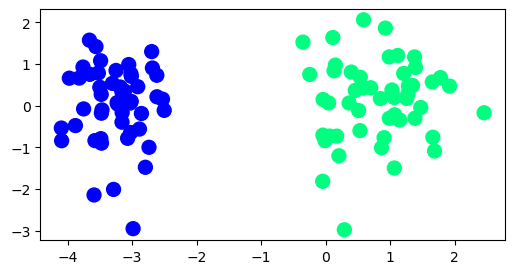

In [2]:

plt.figure(figsize=(6,3))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter', s=100)

In [3]:
def DataShuffle(X_data,Y_data):
    data_num = np.arange(X_data.shape[0])
    np.random.shuffle(data_num)
    return X_data[data_num], Y_data[data_num]

In [4]:
def train_tst_split(X_data, Y_data, ratio=0.3, shuffle = True):
    if shuffle:
        X_data, Y_data = DataShuffle(X_data, Y_data)
    if ratio < 1:
        test_size = len(Y_data) - int(len(Y_data)*ratio)
        x_train, x_test = X_data[:test_size], X_data[test_size:]
        y_train, y_test = Y_data[:test_size], Y_data[test_size:]
    return x_train, x_test, y_train, y_test


In [5]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [6]:
def mean_sq_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [7]:
def logistic_reg(x_train, Y_train, alpha=0.1):
    x_train = np.insert(x_train,0,1, axis=1)
    weight = np.ones(x_train.shape[1])
    # print(x_train[3])
    for i in range(1000):
        j = np.random.randint(0,70)
        y_hat = sigmoid(np.dot(x_train[j],weight))
        loss = -np.sum((Y_train[j] * np.log(sigmoid(np.dot(x_train[j], weight)))) + (1 - Y_train[j]) * np.log(1 - sigmoid(np.dot(x_train[j],weight))))
        # print(f"Iteration {i+1},Loss : {loss}")
        weight = weight + alpha*(Y_train[j] - y_hat)*x_train[j]
    return weight[0],weight[1:]

In [8]:
X_train, X_test, Y_train, Y_test = train_tst_split(X, Y)
intercept, slope = logistic_reg(X_train, Y_train)
# print(intercept, slope)
slope_m = -(slope[0]/slope[1])
intercept_b = -(intercept/slope[1])
print(slope_m, intercept_b)
x_input = np.linspace(-3, 3, 70)
y_input = slope_m*x_input + intercept_b
print(mean_sq_error(Y_train, y_input))

-29.951958009029465 -29.201714165758155
50.51179543590725


(-3.0, 2.0)

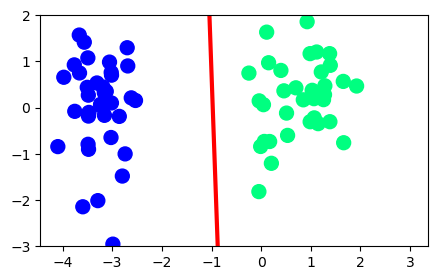

In [9]:
plt.figure(figsize=(5,3))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='winter',s=100)
plt.ylim(-3,2)

Logistic Regression Using Sk_learn

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

415.26815452116153 [543.84515654]
748.6518428928773


(-3.0, 2.0)

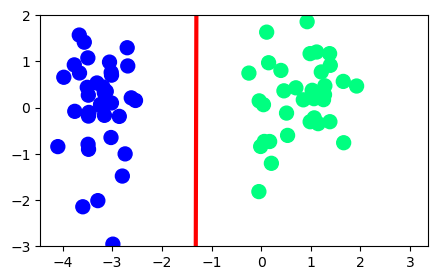

In [12]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])
print(m, b)
x_input1 = np.linspace(-3,3,70)
y_input1 = m*x_input1+b
print(mean_sq_error(Y_train, y_input1))
plt.figure(figsize=(5,3))
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='winter',s=100)
plt.ylim(-3,2)